# ***IMPORT LIBRARY***

In [ ]:
import pandas as pd
import math
import numpy as np
import gdown

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics import mean_absolute_error, mean_squared_error

from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# ***DATASET***

## ***Dataset* Film**

In [ ]:
'''https://drive.google.com/file/d/17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl/view?usp=sharing'''

id = "17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl"
gdown.download(id=id, output="imdb.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=17kQ4-VbHL0Dsn1E9z_OTxgtile3yPIrl
To: /content/imdb.csv
100%|██████████| 1.54M/1.54M [00:00<00:00, 14.9MB/s]


'imdb.csv'

In [ ]:
df_film = pd.read_csv("imdb.csv")
df_film.drop(columns=['Unnamed: 0'], errors='ignore', inplace=True)
df_film

,type,name,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.30,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.10
1,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.20,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.80
2,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.90,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.40
3,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.10,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.40
4,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.20,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Movie,Zombieland,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjIzND...,0,"{'author': 'Fella_shibby', 'dateCreated': '201...",3.80,D,"['Action', 'Comedy', 'Horror']",2009-10-02,"zombie,amusement park,human versus zombie,zomb...",PT1H28M,"[{'name': 'Jesse Eisenberg', 'url': 'https://w...","[{'name': 'Ruben Fleischer', 'url': 'https://w...","[{'name': 'Rhett Reese', 'url': 'https://www.i...",4.30,4.45
850,Movie,iNumber Number: Jozi Gold,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BM2RhYz...,When an undercover cop is tasked with investig...,"{'author': 'penofinspiratin', 'dateCreated': '...",2.20,0,"['Action', 'Adventure', 'Crime']",2023-06-23,"police procedural crime,team action",PT1H53M,"[{'name': 'Lonwabo Bokamoso', 'url': 'https://...","[{'name': 'Donovan Marsh', 'url': 'https://www...","[{'name': 'Donovan Marsh', 'url': 'https://www...",0.00,0.00
851,Movie,¡Que viva México!,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMDFiMD...,0,"{'author': 'cobo-3', 'dateCreated': '2023-03-2...",2.75,R,['Comedy'],2023-03-23,"female full frontal nudity,female nudity,femal...",PT3H11M,"[{'name': 'Damián Alcázar', 'url': 'https://ww...","[{'name': 'Luis Estrada', 'url': 'https://www....","[{'name': 'Luis Estrada', 'url': 'https://www....",0.00,1.45
852,Movie,¿Enco

## ***Dataset Rating***


In [ ]:
'''https://drive.google.com/file/d/1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb/view?usp=sharing'''

id = "1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb"
gdown.download(id=id, output="bert_sentiment_scores.csv", quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1JMBs-PABg9mos8K3EA49HBbtH_1bKiYb
To: /content/bert_sentiment_scores.csv
100%|██████████| 5.68M/5.68M [00:00<00:00, 28.9MB/s]


'bert_sentiment_scores.csv'

In [ ]:
df_rating = pd.read_csv("bert_sentiment_scores.csv")
df_rating

,title,username,Text,Sentiment,sentiment_score
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


In [ ]:
df_rating.describe()

,sentiment_score
count,33136.000000
mean,2.879889
std,1.869132
min,1.002817
25%,1.004068
50%,2.999288
75%,4.996725
max,4.997131


# ***PRE-PROCESSING DATASET RATING***

## ***Detect Outliers***

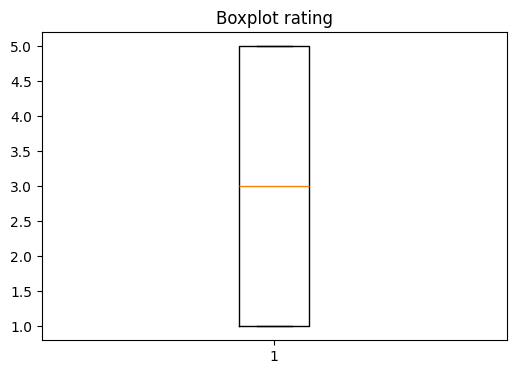

Outlier values:
Series([], Name: sentiment_score, dtype: float64)


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_rating["sentiment_score"])
plt.title(f'Boxplot {"rating"}')
plt.show()

z_scores = stats.zscore(df_rating["sentiment_score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_rating["sentiment_score"][outliers]

print("Outlier values:")
print(outlier_values)

## ***Set Columns***

In [ ]:
df_rating = df_rating.rename(columns={'username': 'nama_akun'})
df_rating = df_rating.rename(columns={'title': 'judul_film'})
df_rating = df_rating.rename(columns={'sentiment_score': 'rating'})

## ***Missing Value***

In [ ]:
print(df_rating.isnull().sum())

judul_film    0
nama_akun     0
Text          0
Sentiment     0
rating        0
dtype: int64


In [ ]:
df_rating

,judul_film,nama_akun,Text,Sentiment,rating
0,Cargo,moviemenfes,this mvs is very sad nangiiis in this scene th...,Positive,4.976672
1,Layar,bicaraboxoffice,if for example there is one film that aired on...,Neutral,2.998256
2,What If,moviemenfes,mvs what if today? how come it s not in disney...,Neutral,1.004498
3,Layar,WatchmenID,for those who miss seeing arini on the big screen,Neutral,2.999633
4,Lightyear,ErikDavis,new trailer chris evans stars as buzz in a new...,Neutral,2.999340
...,...,...,...,...,...
33131,Rise,zavvi,the droids hold a special place in my heart an...,Positive,4.996857
33132,Rise,zavvi,okay campers rise and shine! this sunday at 7p...,Positive,4.996006
33133,Rise,zavvi,star wars episode ix the rise of skywalker zav...,Neutral,2.999873
33134,Seasons,zavvi,season 1 6 blu ray boxset only 69 99 in our !,Neutral,3.000320


# ***TEMPLATE DATASET***

## ***Dataset* Kosong**

Berisi kolom yang akan diisi untuk hasil prediksi *rating* sistem rekomendasi.

In [ ]:
columns = []
columns.append('nama film')
accounts = df_rating.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.name
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

In [ ]:
df = pd.DataFrame(columns=columns)
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True)
df.fillna(0, inplace=True)

/tmp/ipython-input-1358700645.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


## ***Merging Dataset***

Penggabungan kolom pada *dataset* dengan cara mengambil data nama akun dan judul film sebagai kolom, serta *rating* sebagai *value*.

In [ ]:
for rating_index in range(len(df_rating)):
    df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)

df

/tmp/ipython-input-252122209.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df_rating["nama_akun"][rating_index]].loc[df["nama film"] == df_rating["judul_film"][rating_index]] = round(df_rating["rating"][rating_index],2)
/tmp/ipython

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,14 Cameras,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,17 Again,1.01,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1BR,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
3,3 Days to Kill,0.00,0.0,0.0,0.0,1.0,1.00,5.00,0.0,0.0,...,0.00,1.01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0
4,3 Idiots,5.00,0.0,1.0,0.0,0.0,0.00,4.98,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,1.00,0.0,5.0,0.0,1.0,2.98,5.00,5.0,0.0,...,1.01,5.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
850,iNumber Number: Jozi Gold,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
851,¡Que viva México!,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
852,¿Encontró lo que buscaba?,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# ***DATASET* SIAP OLAH**

## ***Sparsity Data***

Sparse data merujuk pada situasi di mana sebagian besar nilai dalam suatu dataset adalah nol

In [ ]:
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 29781
Persentase sparsity: 89.42%


In [ ]:
def cek_nilai_nol(row):
    return len([value for value in row if value != 0])

df['Nilai Nol'] = df.apply(cek_nilai_nol, axis=1)
df_film['Nilai Nol'] = df['Nilai Nol']

df = df[df['Nilai Nol'] > 5]
df_film = df_film[df_film['Nilai Nol'] > 5]

df = df.drop('Nilai Nol', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('Nilai Nol', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.00,0.0,0.0,0.0,1.00,1.00,5.00,0.00,0.00,...,0.00,1.01,0.0,0.00,3.0,0.0,0.00,0.00,0.00,0
1,3 Idiots,5.00,0.0,1.0,0.0,0.00,0.00,4.98,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0
2,5 Cowok Jagoan,0.00,1.0,0.0,0.0,0.00,5.00,5.00,4.99,0.00,...,0.00,0.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
3,6 Underground,1.00,3.0,0.0,0.0,4.59,5.00,0.00,1.00,0.00,...,0.00,1.00,0.0,0.00,0.0,5.0,0.00,0.00,0.00,0
4,65,1.01,1.0,5.0,1.0,1.00,4.99,3.00,1.00,1.00,...,5.00,5.00,5.0,1.02,5.0,1.0,1.01,0.00,1.02,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,1.00,0.0,0.0,5.0,0.00,0.00,0.00,0.00,2.11,...,0.00,0.00,0.0,1.30,0.0,0.0,1.00,0.00,0.00,1
271,Young Adult,0.00,0.0,0.0,0.0,0.00,5.00,1.00,5.00,0.00,...,0.00,1.00,0.0,0.00,1.0,0.0,0.00,0.00,0.00,0
272,Your Place or Mine,1.00,0.0,0.0,3.0,0.00,0.00,0.00,0.00,5.00,...,0.00,0.00,0.0,0.00,0.0,1.0,5.00,0.00,0.00,0
273,Zodiac,5.00,0.0,1.0,0.0,0.00,1.01,0.00,0.00,0.00,...,0.00,0.00,0.0,0.00,0.0,0.0,0.00,4.99,0.00,0


In [ ]:
# cek setelah di drop beberapa film
jumlah_nilai_nol = (df.iloc[:, 1:] == 0).sum().sum()
jumlah_total = df.iloc[:, 1:].size
persentase_sparsity = (jumlah_nilai_nol / jumlah_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {jumlah_nilai_nol}")
print(f"Persentase sparsity: {persentase_sparsity:.2f}%")

Jumlah nilai 0 dalam dataset: 7709
Persentase sparsity: 71.88%


## ***Data Normalization***

Menggunakan ***Min-Max Scaler*** untuk mengubah nilai-nilai dalam suatu fitur (*variabel*) sehingga rentang nilainya antara 0 hingga 1. Guna menghindari bias yang dapat timbul jika beberapa fitur memiliki skala yang jauh berbeda dalam data.

In [ ]:
df_normalized = df.copy()

scaler = MinMaxScaler()
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

df_normalized

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.0,0.0,0.0,0.200,0.200,1.000,0.000,0.000,...,0.000,0.202,0.0,0.000,0.6,0.0,0.000,0.000,0.000,0.0
1,3 Idiots,1.000,0.0,0.2,0.0,0.000,0.000,0.996,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2,5 Cowok Jagoan,0.000,0.2,0.0,0.0,0.000,1.000,1.000,0.998,0.000,...,0.000,0.000,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
3,6 Underground,0.200,0.6,0.0,0.0,0.918,1.000,0.000,0.200,0.000,...,0.000,0.200,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
4,65,0.202,0.2,1.0,0.2,0.200,0.998,0.600,0.200,0.200,...,1.000,1.000,1.0,0.204,1.0,0.2,0.202,0.000,0.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.422,...,0.000,0.000,0.0,0.260,0.0,0.0,0.200,0.000,0.000,1.0
271,Young Adult,0.000,0.0,0.0,0.0,0.000,1.000,0.200,1.000,0.000,...,0.000,0.200,0.0,0.000,0.2,0.0,0.000,0.000,0.000,0.0
272,Your Place or Mine,0.200,0.0,0.0,0.6,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.0,0.000,0.0,0.2,1.000,0.000,0.000,0.0
273,Zodiac,1.000,0.0,0.2,0.0,0.000,0.202,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.998,0.000,0.0


## ***Transposing Dataset***

In [ ]:
df_transposed = df_normalized.set_index('nama film').T
df_transposed

nama film,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
moviemenfes,0.000,1.000,0.000,0.200,0.202,0.200,1.000,0.200,1.000,0.0,...,0.200,0.200,0.204,0.200,1.0,0.200,0.0,0.200,1.000,0.200
bicaraboxoffice,0.000,0.000,0.200,0.600,0.200,0.000,0.000,0.202,0.000,0.2,...,0.200,0.600,0.204,0.000,0.0,0.000,0.0,0.000,0.000,0.000
WatchmenID,0.000,0.200,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.0,...,1.000,1.000,0.000,0.000,0.6,0.000,0.0,0.000,0.200,1.000
ErikDavis,0.000,0.000,0.000,0.000,0.200,0.000,0.000,1.000,0.000,0.0,...,0.000,0.200,0.000,0.000,0.0,1.000,0.0,0.600,0.000,0.000
arulfittron,0.200,0.000,0.000,0.918,0.200,0.000,0.202,0.000,0.000,0.2,...,0.000,0.000,0.000,0.000,1.0,0.000,0.0,0.000,0.000,0.200
GilaFilmID,0.200,0.000,1.000,1.000,0.998,0.000,0.000,0.200,1.000,0.6,...,0.200,0.688,1.000,1.000,0.0,0.000,1.0,0.000,0.202,0.596
TarizSolis,1.000,0.996,1.000,0.000,0.600,0.000,0.000,1.000,1.000,0.6,...,1.000,0.000,1.000,0.000,0.0,0.000,0.2,0.000,0.000,1.000
djaycoholyc,0.000,0.000,0.998,0.200,0.200,0.600,0.000,1.000,0.200,0.2,...,0.000,0.200,1.000,0.000,1.0,0.000,1.0,0.000,0.000,1.000
akstanwyck,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.000,0.992,0.000,0.000,0.0,0.422,0.0,1.000,0.000,0.000
slashfilm,0.000,0.000,0.000,0.000,0.200,0.000,0.000,0.200,0.000,0.0,...,0.600,0.202,0.000,0.000,0.0,1.000,0.0,0.200,0.000,0.000


In [ ]:
# # dataset siap olah
# df_transposed.to_excel("Dataset_Siap_Olah.xlsx", index=True)

# **DISTRIBUSI DATA**

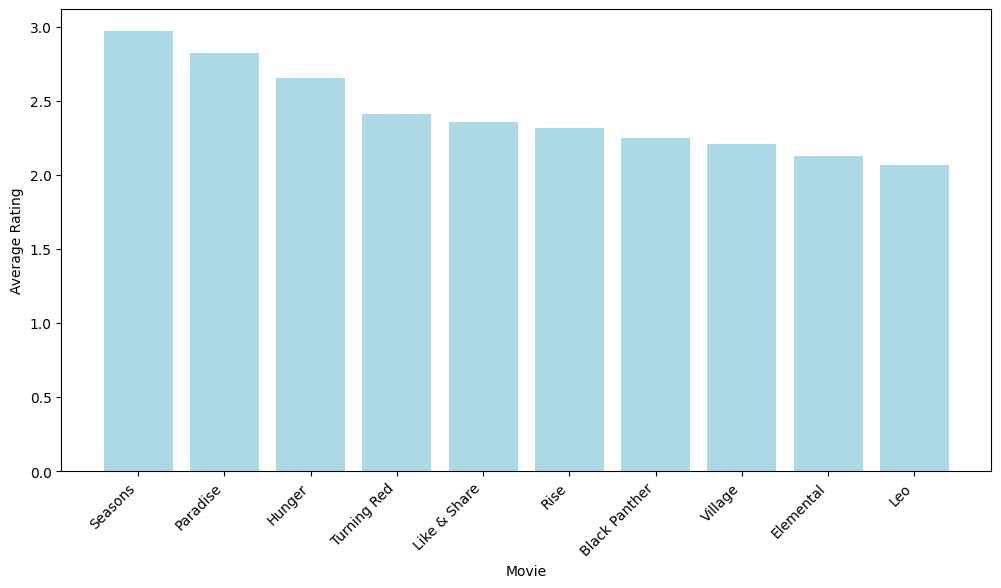

In [ ]:
data = df.copy()
# data = data.replace(0, np.NAN)

data["average"] = data.iloc[:, 1:].mean(axis=1)
data = data.sort_values("average", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(data["nama film"][:10], data["average"][:10], color='lightblue')
plt.xlabel("Movie")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha="right")
plt.show()

# ***CONTENT-BASED FILTERING***

In [ ]:
df_cbf = df_normalized.copy()
df_cbf

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.000,0.0,0.0,0.0,0.200,0.200,1.000,0.000,0.000,...,0.000,0.202,0.0,0.000,0.6,0.0,0.000,0.000,0.000,0.0
1,3 Idiots,1.000,0.0,0.2,0.0,0.000,0.000,0.996,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.0
2,5 Cowok Jagoan,0.000,0.2,0.0,0.0,0.000,1.000,1.000,0.998,0.000,...,0.000,0.000,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
3,6 Underground,0.200,0.6,0.0,0.0,0.918,1.000,0.000,0.200,0.000,...,0.000,0.200,0.0,0.000,0.0,1.0,0.000,0.000,0.000,0.0
4,65,0.202,0.2,1.0,0.2,0.200,0.998,0.600,0.200,0.200,...,1.000,1.000,1.0,0.204,1.0,0.2,0.202,0.000,0.204,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.200,0.0,0.0,1.0,0.000,0.000,0.000,0.000,0.422,...,0.000,0.000,0.0,0.260,0.0,0.0,0.200,0.000,0.000,1.0
271,Young Adult,0.000,0.0,0.0,0.0,0.000,1.000,0.200,1.000,0.000,...,0.000,0.200,0.0,0.000,0.2,0.0,0.000,0.000,0.000,0.0
272,Your Place or Mine,0.200,0.0,0.0,0.6,0.000,0.000,0.000,0.000,1.000,...,0.000,0.000,0.0,0.000,0.0,0.2,1.000,0.000,0.000,0.0
273,Zodiac,1.000,0.0,0.2,0.0,0.000,0.202,0.000,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.000,0.998,0.000,0.0


## ***Set Columns***

In [ ]:
kolom = ['name', 'description', 'genre', 'keywords']
df_film_cbf = df_film[kolom].copy()

df_film_cbf

,name,description,genre,keywords
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"['Action', 'Comedy', 'Drama']","spy,violence,dirty bomb,massacre,cough syrup"
1,3 Idiots,0,"['Comedy', 'Drama']","hairy chest,motivation,coming of age,against t..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"['Action', 'Comedy']","rescue,fight,martial arts,gun,sword"
3,6 Underground,0,"['Action', 'Thriller']","yacht,the future,ensemble cast,italy,florence ..."
4,65,An astronaut crash lands on a mysterious plane...,"['Action', 'Adventure', 'Drama']","gun,shot in the eye,suicide contemplation,astr..."
...,...,...,...,...
270,You People,"Follows a new couple and their families, who f...","['Comedy', 'Romance']","racial tension,black american,couple,love,life"
271,Young Adult,0,"['Comedy', 'Drama']","emotional breakdown,mental illness,narcissism,..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"['Comedy', 'Romance']","friend,best friend,volunteer,teenager,son"
273,Zodiac,0,"['Crime', 'Drama', 'Mystery']","zodiac killer,serial killer,mysterious murdere..."


In [ ]:
# mengganti nilai string '0'
df_film_cbf['description'] = df_film_cbf['description'].replace('0', '')

df_film_cbf['content'] = df_film_cbf['description'].astype(str) + ' ' + \
                         df_film_cbf['genre'].astype(str) + ' ' + \
                         df_film_cbf['keywords'].astype(str)

In [ ]:
df_film_cbf['content']

,content
0,A dying CIA agent trying to reconnect with his...
1,"['Comedy', 'Drama'] hairy chest,motivation,co..."
2,5 lifelong friends attempt to rescue a damsel ...
3,"['Action', 'Thriller'] yacht,the future,ensem..."
4,An astronaut crash lands on a mysterious plane...
...,...
270,"Follows a new couple and their families, who f..."
271,"['Comedy', 'Drama'] emotional breakdown,menta..."
272,Two long-distance best friends change each oth...
273,"['Crime', 'Drama', 'Mystery'] zodiac killer,s..."


# ***Teks Preprocessing (TF-IDF)***

In [ ]:
# vektorizer TF-IDF untuk mengubah fitur teks menjadi vektor numerik
tfidf = TfidfVectorizer(stop_words='english')

# menerapkan vektorisasi TF-IDF
tfidf_matrix = tfidf.fit_transform(df_film['keywords'].fillna('') + ' ' + df_film['genre'].fillna('') + ' ' + df_film['description'].fillna(''))

## ***Item Similarity***

In [ ]:
# menghitung cosine similarity
sim_matrix4 = linear_kernel(tfidf_matrix, tfidf_matrix)

sim_tfidf = pd.DataFrame(sim_matrix4, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_tfidf

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,1.000000,0.021934,0.036015,0.010704,0.013459,0.004680,0.041715,0.024169,0.013757,0.032900,...,0.000000,0.004615,0.019603,0.028378,0.048616,0.023155,0.020862,0.008329,0.006215,0.018223
3 Idiots,0.021934,1.000000,0.032191,0.000000,0.008821,0.007901,0.006519,0.018445,0.023226,0.008324,...,0.000000,0.007792,0.033096,0.006245,0.012571,0.013499,0.035221,0.014063,0.010493,0.016288
5 Cowok Jagoan,0.036015,0.032191,1.000000,0.024569,0.072778,0.027567,0.000000,0.047688,0.020190,0.000000,...,0.000000,0.000000,0.021145,0.000000,0.017091,0.018352,0.030617,0.112341,0.000000,0.041828
6 Underground,0.010704,0.000000,0.024569,1.000000,0.011937,0.296097,0.000000,0.000000,0.000000,0.000000,...,0.058805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012432
65,0.013459,0.008821,0.072778,0.011937,1.000000,0.005219,0.004306,0.044591,0.005532,0.016181,...,0.000000,0.005147,0.011588,0.004125,0.009098,0.000000,0.008389,0.064340,0.051152,0.009563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.023155,0.013499,0.018352,0.000000,0.000000,0.000000,0.025957,0.034142,0.055561,0.018362,...,0.000000,0.098182,0.008867,0.049854,0.007167,1.000000,0.012839,0.021032,0.000000,0.009286
Young Adult,0.020862,0.035221,0.030617,0.000000,0.008389,0.007515,0.006200,0.017543,0.022091,0.007917,...,0.000000,0.080063,0.031478,0.005940,0.011957,0.012839,1.000000,0.013375,0.009980,0.015492
Your Place or Mine,0.008329,0.014063,0.112341,0.000000,0.064340,0.000000,0.000000,0.016792,0.023139,0.085714,...,0.000000,0.013321,0.009237,0.000000,0.108358,0.021032,0.013375,1.000000,0.000000,0.009674
Zodiac,0.006215,0.010493,0.000000,0.000000,0.051152,0.027888,0.023010,0.005226,0.006581,0.006541,...,0.000000,0.006122,0.013784,0.037397,0.000000,0.000000,0.009980,0.000000,1.000000,0.000000


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_tfidf[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Ip Man                   0.352382
Mile 22                  0.330200
Buffalo Boys             0.306073
Headshot                 0.259204
5 Cowok Jagoan           0.249179
Kung Fu Panda            0.213430
Knights of the Zodiac    0.192777
Furies                   0.181723
Tarung Sarung            0.123709
Blood Red Sky            0.100198
Name: Merantau, dtype: float64


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_tfidf = target
tfidf_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_tfidf)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if tfidf_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            item_sim = list(enumerate(sim_matrix4[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                tfidf_cbf_result[idx_item][idx_user] = 0
            else:
                pred_rating = pred_rating / count
                tfidf_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_TFIDF = pd.DataFrame(tfidf_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 55
Processing user 17 & item 56
Processing user 17 & item 57
Processing user 17 & item 59
Processing user 17 & item 61
Processing user 17 & item 62
Processing user 17 & item 63
Processing user 17 & item 64
Processing user 17 & item 65
Processing user 17 & item 66
Processing user 17 & item 68
Processing user 17 & item 71
Processing user 17 & item 72
Processing user 17 & item 73
Processing user 17 & item 74
Processing user 17 & item 76
Processing user 17 & item 77
Processing user 17 & item 78
Processing user 17 & item 81
Processing user 17 & item 83
Processing user 17 & item 84
Processing user 17 & item 85
Processing user 17 & item 86
Processing user 17 & item 88
Processing user 17 & item 89
Processing user 17 & item 90
Processing user 17 & item 91
Processing user 17 & item 92
Processing user 17 & item 95
Processing user 17 & item 99
Processing user 17 & item 100
Processing user 17 & item 101
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_tfidf))
print(len(tfidf_cbf_result))

(40, 275)
40
275


## ***EVALUATION***

In [ ]:
df_actualcbf = df_cbf.copy()
df_predcbf = ResultCBF_TFIDF.copy()

df_actual_values = df_actualcbf.drop(columns='nama film').to_numpy()
df_pred_values = df_predcbf.drop(columns='nama film').to_numpy()

y_actualcbf = df_actual_values.flatten()
y_predcbf = df_pred_values.flatten()

In [ ]:
MAE_CBF = mean_absolute_error(y_actualcbf, y_predcbf)
MSE_CBF = mean_squared_error(y_actualcbf, y_predcbf)
rmse_cbf_tfidf = math.sqrt(MSE_CBF)

print("Mean Absolute Error (MAE):", MAE_CBF)
print("Root Mean Square Error (RMSE):", rmse_cbf_tfidf)

Mean Absolute Error (MAE): 0.11151960150873767
Root Mean Square Error (RMSE): 0.15753212767331662


In [ ]:
ResultCBF_TFIDF.to_excel("ResultCBF_TFIDF.xlsx")
ResultCBF_TFIDF

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.29573,0.242207,0.351324,0.111531,0.2,0.2,1.0,0.367384,0.150947,...,0.208356,0.202,0.153316,0.143325,0.6,0.192048,0.089703,0.089897,0.033256,0.015201
1,3 Idiots,1.0,0.199627,0.2,0.111595,0.37277,0.477446,0.996,0.363043,0.133663,...,0.232896,0.237216,0.107855,0.142219,0.120725,0.193627,0.049092,0.087168,0.027319,0.012329
2,5 Cowok Jagoan,0.292916,0.2,0.285981,0.102499,0.290839,1.0,1.0,0.998,0.150175,...,0.137944,0.378886,0.157911,0.098283,0.153663,1.0,0.049853,0.047255,0.025173,0.002732
3,6 Underground,0.2,0.6,0.336746,0.091938,0.918,1.0,0.258136,0.2,0.123838,...,0.171474,0.2,0.183534,0.127102,0.139975,1.0,0.044827,0.046221,0.017305,0.0
4,65,0.202,0.2,1.0,0.2,0.2,0.998,0.6,0.2,0.2,...,1.0,1.0,1.0,0.204,1.0,0.2,0.202,0.107129,0.204,0.002884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.2,0.218432,0.368751,1.0,0.367407,0.456134,0.36689,0.420443,0.422,...,0.269316,0.258068,0.182957,0.26,0.147744,0.242855,0.2,0.099497,0.055649,1.0
271,Young Adult,0.359897,0.273354,0.334686,0.094584,0.366027,1.0,0.2,1.0,0.120195,...,0.19037,0.2,0.07979,0.132264,0.2,0.261346,0.047663,0.121985,0.05919,0.007672
272,Your Place or Mine,0.2,0.201001,0.304566,0.6,0.32231,0.45165,0.317221,0.367267,1.0,...,0.2102,0.327992,0.13769,0.132636,0.177612,0.2,1.0,0.127091,0.045617,0.031138
273,Zodiac,1.0,0.175548,0.2,0.050927,0.316943,0.202,0.349336,0.37298,0.080514,...,0.247355,0.281631,0.136835,0.072598,0.119934,0.184789,0.035526,0.998,0.010817,0.004352


# Word Embedding BERT

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# tokenizer dan Bert
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# word embedding dari teks
def get_embedding(text):
    tokens = tokenizer.encode(text, return_tensors='pt')

    # output embedding dari model
    with torch.no_grad():
        output = model(tokens)

    embedding = output.last_hidden_state.mean(dim=1)

    return embedding.numpy()

# terapkan fungsi pada kolom 'content'
df_film_cbf['embedding'] = df_film_cbf['content'].apply(get_embedding)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
df_film_cbf[['name', 'content', 'embedding']]

,name,content,embedding
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"[[0.02630194, 0.08896381, 0.21738558, -0.12125..."
1,3 Idiots,"['Comedy', 'Drama'] hairy chest,motivation,co...","[[0.10330883, 0.18147619, 0.26162362, -0.43653..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"[[0.06963689, 0.36724102, 0.42340767, -0.28045..."
3,6 Underground,"['Action', 'Thriller'] yacht,the future,ensem...","[[-0.09995068, 0.009359332, 0.4865548, -0.3605..."
4,65,An astronaut crash lands on a mysterious plane...,"[[-0.07705143, 0.27352425, 0.40611556, -0.0559..."
...,...,...,...
270,You People,"Follows a new couple and their families, who f...","[[0.0038675677, 0.47882727, 0.26669645, -0.167..."
271,Young Adult,"['Comedy', 'Drama'] emotional breakdown,menta...","[[0.14081514, 0.3846165, 0.19736378, -0.435445..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"[[-0.084960476, 0.27357212, 0.44194406, -0.191..."
273,Zodiac,"['Crime', 'Drama', 'Mystery'] zodiac killer,s...","[[0.2264884, 0.4530309, 0.47956106, -0.5220647..."


In [ ]:
def avg_embedding(embedding):
    return np.mean(embedding, axis=1)

# terapkan fungsi pada kolom 'embedding'
df_film_cbf['average_embedding'] = df_film_cbf['embedding'].apply(avg_embedding)

df_film_cbf[['name', 'average_embedding']]

,name,average_embedding
0,3 Days to Kill,[-0.012152187]
1,3 Idiots,[-0.011573218]
2,5 Cowok Jagoan,[-0.012355744]
3,6 Underground,[-0.011868018]
4,65,[-0.0119938515]
...,...,...
270,You People,[-0.011852226]
271,Young Adult,[-0.011984266]
272,Your Place or Mine,[-0.012008995]
273,Zodiac,[-0.0118466215]


In [ ]:
embeddings = np.vstack(df_film_cbf['embedding'].to_numpy())

## ***Item Similarity***

In [ ]:
# cosine similarity
sim_matrix3 = cosine_similarity(embeddings)
sim_bert = pd.DataFrame(sim_matrix3, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_bert

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,1.000000,0.819183,0.873523,0.763702,0.889846,0.878325,0.859384,0.856277,0.883366,0.876985,...,0.666453,0.842093,0.874166,0.901547,0.859379,0.816336,0.796121,0.859507,0.811278,0.807340
3 Idiots,0.819183,1.000000,0.799836,0.800385,0.840685,0.798025,0.770395,0.804630,0.816473,0.767312,...,0.734255,0.751764,0.839480,0.784897,0.787384,0.786848,0.865944,0.795551,0.836910,0.838412
5 Cowok Jagoan,0.873523,0.799836,1.000000,0.760596,0.879701,0.871846,0.815153,0.833283,0.867513,0.863292,...,0.680209,0.832875,0.865828,0.845417,0.870121,0.824018,0.783959,0.857332,0.784830,0.825191
6 Underground,0.763702,0.800385,0.760596,1.000000,0.814700,0.787581,0.731298,0.723816,0.783645,0.740634,...,0.745847,0.730149,0.772139,0.747857,0.737819,0.722521,0.778256,0.736526,0.787860,0.766300
65,0.889846,0.840685,0.879701,0.814700,1.000000,0.866143,0.827201,0.874196,0.862591,0.890586,...,0.710902,0.827273,0.868234,0.873303,0.877952,0.803717,0.815505,0.867262,0.819804,0.839279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.816336,0.786848,0.824018,0.722521,0.803717,0.820911,0.863276,0.815063,0.863150,0.833011,...,0.619063,0.887550,0.825322,0.837859,0.782750,1.000000,0.754450,0.836180,0.721407,0.732323
Young Adult,0.796121,0.865944,0.783959,0.778256,0.815505,0.776985,0.777695,0.775180,0.816634,0.782267,...,0.736037,0.735666,0.833836,0.771864,0.776947,0.754450,1.000000,0.791075,0.846674,0.809885
Your Place or Mine,0.859507,0.795551,0.857332,0.736526,0.867262,0.813141,0.832219,0.910615,0.897250,0.869444,...,0.659902,0.861768,0.856944,0.850113,0.868323,0.836180,0.791075,1.000000,0.748187,0.739302
Zodiac,0.811278,0.836910,0.784830,0.787860,0.819804,0.812203,0.752946,0.739095,0.794788,0.776953,...,0.760727,0.709845,0.779518,0.804657,0.792347,0.721407,0.846674,0.748187,1.000000,0.870290


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_bert[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Buffalo Boys                  0.871013
The Outpost                   0.854386
Green Lantern                 0.851246
How to Train Your Dragon 2    0.846706
Amigos                        0.842826
Nightcrawler                  0.841844
Bright                        0.841617
Seventh Son                   0.838540
Uncut Gems                    0.837500
The Space Between Us          0.836577
Name: Merantau, dtype: float32


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_bert = target

bert_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_bert)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if bert_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            # menghitung prediksi rating
            item_sim = list(enumerate(sim_matrix3[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            # prediksi rating berdasarkan similarity
            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                bert_cbf_result[idx_item][idx_user] = 0  # tidak ada item mirip
            else:
                # membagi prediksi dengan total similarity
                pred_rating = pred_rating / count
                bert_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_BERT = pd.DataFrame(bert_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 55
Processing user 17 & item 56
Processing user 17 & item 57
Processing user 17 & item 59
Processing user 17 & item 61
Processing user 17 & item 62
Processing user 17 & item 63
Processing user 17 & item 64
Processing user 17 & item 65
Processing user 17 & item 66
Processing user 17 & item 68
Processing user 17 & item 71
Processing user 17 & item 72
Processing user 17 & item 73
Processing user 17 & item 74
Processing user 17 & item 76
Processing user 17 & item 77
Processing user 17 & item 78
Processing user 17 & item 81
Processing user 17 & item 83
Processing user 17 & item 84
Processing user 17 & item 85
Processing user 17 & item 86
Processing user 17 & item 88
Processing user 17 & item 89
Processing user 17 & item 90
Processing user 17 & item 91
Processing user 17 & item 92
Processing user 17 & item 95
Processing user 17 & item 99
Processing user 17 & item 100
Processing user 17 & item 101
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_bert))
print(len(df_cbf))

(40, 275)
40
275


## ***EVALUATION***

In [ ]:
df_actualbert = df_cbf.copy()
df_predbert = ResultCBF_BERT.copy()

df_actual_values = df_actualbert.drop(columns='nama film').to_numpy()
df_pred_values = df_predbert.drop(columns='nama film').to_numpy()

y_actualbert = df_actual_values.flatten()
y_predbert = df_pred_values.flatten()

In [ ]:
MAE_bert = mean_absolute_error(y_actualbert, y_predbert)
MSE_bert = mean_squared_error(y_actualbert, y_predbert)
rmse_cbf_bert = math.sqrt(MSE_bert)

print("Mean Absolute Error (MAE):", MAE_bert)
print("Root Mean Square Error (RMSE):", rmse_cbf_bert)

Mean Absolute Error (MAE): 0.1082308445139712
Root Mean Square Error (RMSE): 0.15230477798884098


In [ ]:
ResultCBF_BERT.to_excel("ResultCBF_BERT.xlsx")
ResultCBF_BERT

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.335503,0.215297,0.31548,0.091712,0.2,0.2,1.0,0.360967,0.120081,...,0.174705,0.202,0.141778,0.107629,0.6,0.18764,0.042922,0.105918,0.031675,0.007061
1,3 Idiots,1.0,0.21564,0.2,0.091847,0.308871,0.426805,0.996,0.361878,0.119981,...,0.176349,0.324092,0.143637,0.109449,0.143014,0.189266,0.043012,0.105108,0.031474,0.007496
2,5 Cowok Jagoan,0.336618,0.2,0.317684,0.092688,0.30797,1.0,1.0,0.998,0.120915,...,0.175575,0.325176,0.143037,0.108913,0.142641,1.0,0.042957,0.103973,0.032081,0.007257
3,6 Underground,0.2,0.6,0.31712,0.091669,0.918,1.0,0.326623,0.2,0.120577,...,0.17677,0.2,0.144332,0.110454,0.142529,1.0,0.042999,0.104842,0.031576,0.00724
4,65,0.202,0.2,1.0,0.2,0.2,0.998,0.6,0.2,0.2,...,1.0,1.0,1.0,0.204,1.0,0.2,0.202,0.104724,0.204,0.007028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.2,0.214055,0.318386,1.0,0.306882,0.426244,0.3256,0.362671,0.422,...,0.176244,0.323837,0.141894,0.26,0.143234,0.190211,0.2,0.107436,0.033252,1.0
271,Young Adult,0.342943,0.216187,0.31647,0.092042,0.309504,1.0,0.2,1.0,0.120032,...,0.176475,0.2,0.144102,0.109832,0.2,0.19031,0.043088,0.105878,0.031716,0.007567
272,Your Place or Mine,0.2,0.215933,0.317045,0.6,0.30764,0.427074,0.327084,0.363072,1.0,...,0.17667,0.322224,0.141245,0.108864,0.142895,0.2,1.0,0.105712,0.032804,0.007418
273,Zodiac,1.0,0.21787,0.2,0.090491,0.309093,0.202,0.32684,0.362306,0.119829,...,0.176006,0.326261,0.145565,0.10992,0.142919,0.188771,0.042909,0.998,0.030653,0.007258


# Word Embedding RoBERTa

In [ ]:
from transformers import RobertaTokenizer, RobertaModel
import torch

# tokenizer dan RoBERTa
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaModel.from_pretrained('roberta-base')

# word embedding dari teks
def get_embedding(text):
    tokens = tokenizer.encode(text, return_tensors='pt')

    # output embedding dari model
    with torch.no_grad():
        output = model(tokens)

    embedding = output.last_hidden_state.mean(dim=1)

    return embedding.numpy()

# terapkan fungsi pada kolom 'content'
df_film_cbf['embedding'] = df_film_cbf['content'].apply(get_embedding)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
df_film_cbf[['name', 'content', 'embedding']]

,name,content,embedding
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"[[-0.045224972, 0.06570137, 0.07008492, 0.0442..."
1,3 Idiots,"['Comedy', 'Drama'] hairy chest,motivation,co...","[[0.00723928, 0.023784416, 0.05892408, 0.01317..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"[[-0.048691466, 0.09946178, 0.07908643, 0.0587..."
3,6 Underground,"['Action', 'Thriller'] yacht,the future,ensem...","[[-0.015836023, 0.009272607, 0.09293624, 0.149..."
4,65,An astronaut crash lands on a mysterious plane...,"[[0.015206882, -0.0052494486, 0.04325614, 0.08..."
...,...,...,...
270,You People,"Follows a new couple and their families, who f...","[[0.009572815, 0.10583176, 0.072194144, 0.0194..."
271,Young Adult,"['Comedy', 'Drama'] emotional breakdown,menta...","[[-0.0042730253, 0.04471733, 0.055717863, 0.14..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"[[0.03451758, 0.12987287, 0.0598381, 0.1322064..."
273,Zodiac,"['Crime', 'Drama', 'Mystery'] zodiac killer,s...","[[0.008716977, 0.03540421, 0.055931523, 0.2132..."


In [ ]:
def avg_embedding(embedding):
    return np.mean(embedding, axis=1)

# terapkan fungsi pada kolom 'embedding'
df_film_cbf['average_embedding'] = df_film_cbf['embedding'].apply(avg_embedding)

df_film_cbf[['name', 'average_embedding']]

,name,average_embedding
0,3 Days to Kill,[0.01926084]
1,3 Idiots,[0.01887867]
2,5 Cowok Jagoan,[0.019562624]
3,6 Underground,[0.018977357]
4,65,[0.018901816]
...,...,...
270,You People,[0.020177599]
271,Young Adult,[0.020126639]
272,Your Place or Mine,[0.019615544]
273,Zodiac,[0.020072734]


In [ ]:
embeddings = np.vstack(df_film_cbf['embedding'].to_numpy())

## ***Item Similarity***

In [ ]:
# cosine similarity
sim_matrix2 = cosine_similarity(embeddings)
sim_roberta = pd.DataFrame(sim_matrix2, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_roberta

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,0.999999,0.975909,0.989264,0.969363,0.990247,0.989514,0.985815,0.987438,0.990751,0.988775,...,0.945436,0.987254,0.986133,0.990675,0.988048,0.983653,0.975718,0.988451,0.978084,0.980560
3 Idiots,0.975909,0.999999,0.978860,0.985145,0.980280,0.976133,0.978850,0.971416,0.980082,0.978368,...,0.966955,0.970919,0.984948,0.972008,0.977501,0.976431,0.988194,0.974688,0.980864,0.984533
5 Cowok Jagoan,0.989264,0.978860,1.000000,0.974002,0.987340,0.991072,0.983354,0.984335,0.988795,0.987671,...,0.954071,0.984010,0.988951,0.985946,0.988283,0.985025,0.978517,0.985958,0.977854,0.985691
6 Underground,0.969363,0.985145,0.974002,0.999999,0.977209,0.975006,0.973294,0.963576,0.973551,0.974206,...,0.973160,0.965881,0.977426,0.965079,0.970168,0.969766,0.978986,0.969424,0.976206,0.979970
65,0.990247,0.980280,0.987340,0.977209,1.000000,0.988192,0.983863,0.985097,0.989260,0.988859,...,0.953974,0.984833,0.987852,0.986455,0.986792,0.981066,0.978703,0.986333,0.982191,0.983939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.983653,0.976431,0.985025,0.969766,0.981066,0.983987,0.985457,0.980081,0.988419,0.984852,...,0.944348,0.985768,0.987365,0.984350,0.981275,1.000000,0.976583,0.982766,0.971586,0.979392
Young Adult,0.975718,0.988194,0.978517,0.978986,0.978703,0.974915,0.976054,0.968857,0.980746,0.975711,...,0.962847,0.972880,0.984599,0.971509,0.975032,0.976583,0.999999,0.974900,0.984561,0.985098
Your Place or Mine,0.988451,0.974688,0.985958,0.969424,0.986333,0.983880,0.985513,0.990111,0.989110,0.988769,...,0.944863,0.985680,0.985566,0.987238,0.986602,0.982766,0.974900,1.000000,0.971339,0.975840
Zodiac,0.978084,0.980864,0.977854,0.976206,0.982191,0.979350,0.973483,0.966905,0.979597,0.975885,...,0.959015,0.971397,0.981656,0.974504,0.975304,0.971586,0.984561,0.971339,1.000000,0.987018


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_roberta[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Uncut Gems            0.989466
Faraway               0.989105
Olympus Has Fallen    0.988438
Turning Red           0.988110
Zombieland            0.988105
Buffalo Boys          0.988014
The Ritual            0.987916
Velvet Buzzsaw        0.987570
The Interview         0.987386
Nightcrawler          0.986759
Name: Merantau, dtype: float32


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_roberta = target

roberta_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_roberta)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if roberta_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            # menghitung prediksi rating
            item_sim = list(enumerate(sim_matrix2[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            # prediksi rating berdasarkan similarity
            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                roberta_cbf_result[idx_item][idx_user] = 0  # tidak ada item mirip
            else:
                # membagi prediksi dengan total similarity
                pred_rating = pred_rating / count
                roberta_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_ROBERTA = pd.DataFrame(roberta_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 55
Processing user 17 & item 56
Processing user 17 & item 57
Processing user 17 & item 59
Processing user 17 & item 61
Processing user 17 & item 62
Processing user 17 & item 63
Processing user 17 & item 64
Processing user 17 & item 65
Processing user 17 & item 66
Processing user 17 & item 68
Processing user 17 & item 71
Processing user 17 & item 72
Processing user 17 & item 73
Processing user 17 & item 74
Processing user 17 & item 76
Processing user 17 & item 77
Processing user 17 & item 78
Processing user 17 & item 81
Processing user 17 & item 83
Processing user 17 & item 84
Processing user 17 & item 85
Processing user 17 & item 86
Processing user 17 & item 88
Processing user 17 & item 89
Processing user 17 & item 90
Processing user 17 & item 91
Processing user 17 & item 92
Processing user 17 & item 95
Processing user 17 & item 99
Processing user 17 & item 100
Processing user 17 & item 101
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_roberta))
print(len(df_cbf))

(40, 275)
40
275


## ***EVALUATION***

In [ ]:
df_actualroberta = df_cbf.copy()
df_predroberta = ResultCBF_ROBERTA.copy()

df_actual_values = df_actualroberta.drop(columns='nama film').to_numpy()
df_pred_values = df_predroberta.drop(columns='nama film').to_numpy()

y_actualroberta = df_actual_values.flatten()
y_predroberta = df_pred_values.flatten()

In [ ]:
MAE_roberta = mean_absolute_error(y_actualroberta, y_predroberta)
MSE_roberta = mean_squared_error(y_actualroberta, y_predroberta)
rmse_cbf_roberta = math.sqrt(MSE_roberta)

print("Mean Absolute Error (MAE):", MAE_roberta)
print("Root Mean Square Error (RMSE):", rmse_cbf_roberta)

Mean Absolute Error (MAE): 0.10847593163936844
Root Mean Square Error (RMSE): 0.1525907655468947


In [ ]:
ResultCBF_ROBERTA.to_excel("ResultCBF_ROBERTA.xlsx")
ResultCBF_ROBERTA

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.336488,0.215566,0.316439,0.091988,0.2,0.2,1.0,0.361577,0.120248,...,0.174991,0.202,0.141857,0.109684,0.6,0.188191,0.042758,0.105629,0.031583,0.007272
1,3 Idiots,1.0,0.215804,0.2,0.091872,0.308313,0.426138,0.996,0.361841,0.120188,...,0.175134,0.324157,0.142131,0.109928,0.143043,0.188358,0.042774,0.105459,0.031491,0.007335
2,5 Cowok Jagoan,0.337748,0.2,0.317673,0.092284,0.30905,1.0,1.0,0.998,0.120687,...,0.175644,0.325262,0.142529,0.110167,0.143507,1.0,0.042911,0.105882,0.031671,0.007322
3,6 Underground,0.2,0.6,0.317785,0.09212,0.918,1.0,0.327603,0.2,0.120619,...,0.175856,0.2,0.142713,0.110373,0.143525,1.0,0.042909,0.105751,0.031584,0.007346
4,65,0.202,0.2,1.0,0.2,0.2,0.998,0.6,0.2,0.2,...,1.0,1.0,1.0,0.204,1.0,0.2,0.202,0.105935,0.204,0.007298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.2,0.216285,0.317645,1.0,0.308947,0.427399,0.327371,0.363083,0.422,...,0.175661,0.325201,0.14246,0.26,0.14358,0.189002,0.2,0.106059,0.031749,1.0
271,Young Adult,0.338281,0.216629,0.317683,0.09221,0.309377,1.0,0.2,1.0,0.120597,...,0.175774,0.2,0.14271,0.110333,0.2,0.18915,0.042953,0.105957,0.031642,0.007394
272,Your Place or Mine,0.2,0.216358,0.317565,0.6,0.308985,0.427334,0.327455,0.362976,1.0,...,0.175716,0.325105,0.142275,0.110114,0.143541,0.2,1.0,0.106065,0.031721,0.007312
273,Zodiac,1.0,0.216565,0.2,0.092119,0.309255,0.202,0.327504,0.362997,0.120559,...,0.175682,0.325397,0.142818,0.110252,0.143529,0.189006,0.042922,0.998,0.03159,0.007349


# Word Embedding DistilBERT

In [ ]:
from transformers import DistilBertTokenizer, DistilBertModel
import torch

# tokenizer dan Distilbert
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# word embedding dari teks
def get_embedding(text):
    tokens = tokenizer.encode(text, return_tensors='pt')

    # output embedding dari model
    with torch.no_grad():
        output = model(tokens)

    embedding = output.last_hidden_state.mean(dim=1)

    return embedding.numpy()

# terapkan fungsi pada kolom 'content'
df_film_cbf['embedding'] = df_film_cbf['content'].apply(get_embedding)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
df_film_cbf[['name', 'content', 'embedding']]

,name,content,embedding
0,3 Days to Kill,A dying CIA agent trying to reconnect with his...,"[[0.02597541, 0.13719822, 0.1801008, -0.024634..."
1,3 Idiots,"['Comedy', 'Drama'] hairy chest,motivation,co...","[[0.12613922, 0.26205394, 0.09137705, -0.24748..."
2,5 Cowok Jagoan,5 lifelong friends attempt to rescue a damsel ...,"[[0.107086934, 0.20807602, 0.19547209, -0.0619..."
3,6 Underground,"['Action', 'Thriller'] yacht,the future,ensem...","[[-0.019539727, 0.032236353, 0.34236285, -0.14..."
4,65,An astronaut crash lands on a mysterious plane...,"[[-0.16970687, 0.26390642, 0.2460613, 0.038229..."
...,...,...,...
270,You People,"Follows a new couple and their families, who f...","[[0.054674417, 0.3360118, 0.26174608, -0.09806..."
271,Young Adult,"['Comedy', 'Drama'] emotional breakdown,menta...","[[0.029500654, 0.40208912, 0.027828457, -0.233..."
272,Your Place or Mine,Two long-distance best friends change each oth...,"[[-0.09235086, 0.095480375, 0.43527222, -0.079..."
273,Zodiac,"['Crime', 'Drama', 'Mystery'] zodiac killer,s...","[[0.2748747, 0.29071257, 0.2629993, -0.2596049..."


In [ ]:
def avg_embedding(embedding):
    return np.mean(embedding, axis=1)

# terapkan fungsi pada kolom 'embedding'
df_film_cbf['average_embedding'] = df_film_cbf['embedding'].apply(avg_embedding)

df_film_cbf[['name', 'average_embedding']]

,name,average_embedding
0,3 Days to Kill,[-0.009943496]
1,3 Idiots,[-0.009615379]
2,5 Cowok Jagoan,[-0.009844818]
3,6 Underground,[-0.009528638]
4,65,[-0.010182235]
...,...,...
270,You People,[-0.010289728]
271,Young Adult,[-0.009767693]
272,Your Place or Mine,[-0.010026115]
273,Zodiac,[-0.00974726]


In [ ]:
embeddings = np.vstack(df_film_cbf['embedding'].to_numpy())

## ***Item Similarity***

In [ ]:
# cosine similarity
sim_matrix1 = cosine_similarity(embeddings)
sim_distilbert = pd.DataFrame(sim_matrix1, index=df_cbf['nama film'].values, columns=df_cbf['nama film'].values)
sim_distilbert

,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Underground,65,A Classic Horror Story,A Ghost Story,A Man Called Otto,A Perfect Fit,A Wrinkle in Time,...,Weathering,What If,Why Do You Love Me,Wind River,Wish Dragon,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
3 Days to Kill,1.000000,0.866453,0.915595,0.820194,0.916011,0.904665,0.882797,0.895162,0.887753,0.897853,...,0.722532,0.861128,0.906810,0.927482,0.891221,0.849982,0.862606,0.885154,0.854096,0.838700
3 Idiots,0.866453,1.000000,0.880794,0.861708,0.871978,0.847937,0.829894,0.853330,0.857294,0.820989,...,0.798282,0.814575,0.886949,0.835112,0.851751,0.861001,0.923264,0.851499,0.878894,0.883971
5 Cowok Jagoan,0.915595,0.880794,1.000000,0.820035,0.909756,0.921887,0.839503,0.882294,0.880918,0.889890,...,0.731112,0.853763,0.899297,0.885819,0.908010,0.858028,0.854413,0.886784,0.859052,0.883116
6 Underground,0.820194,0.861708,0.820035,1.000000,0.871961,0.846027,0.785594,0.768052,0.813947,0.800591,...,0.798897,0.781214,0.823417,0.796758,0.790340,0.805722,0.853191,0.777041,0.855538,0.845594
65,0.916011,0.871978,0.909756,0.871961,1.000000,0.909510,0.860796,0.888222,0.872004,0.906391,...,0.751880,0.846406,0.900695,0.891240,0.893058,0.841811,0.866279,0.872852,0.858697,0.869931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.849982,0.861001,0.858028,0.805722,0.841811,0.861427,0.887449,0.860410,0.889980,0.856603,...,0.694609,0.918537,0.877724,0.857154,0.834788,1.000000,0.853180,0.876674,0.781067,0.796728
Young Adult,0.862606,0.923264,0.854413,0.853191,0.866279,0.844809,0.840922,0.829542,0.852616,0.829747,...,0.781541,0.820653,0.888115,0.832800,0.836284,0.853180,1.000000,0.844942,0.882068,0.863157
Your Place or Mine,0.885154,0.851499,0.886784,0.777041,0.872852,0.841480,0.854655,0.936757,0.922096,0.893686,...,0.703228,0.889648,0.886639,0.872400,0.893487,0.876674,0.844942,1.000000,0.794924,0.782220
Zodiac,0.854096,0.878894,0.859052,0.855538,0.858697,0.851375,0.805014,0.782540,0.829231,0.822788,...,0.810331,0.768176,0.835783,0.849024,0.824470,0.781067,0.882068,0.794924,1.000000,0.890739


### ***Top N Recommendations***

In [ ]:
nama_film = "Merantau"
recom = sim_distilbert[nama_film].sort_values(ascending=False)[1:11] # Top 10
print(f"Rekomendasi untuk film '{nama_film}':")
print(recom)

Rekomendasi untuk film 'Merantau':
Buffalo Boys                  0.925228
The Mother                    0.898696
Nightcrawler                  0.895936
How to Train Your Dragon 2    0.892571
The Outpost                   0.891755
Uncut Gems                    0.891721
Seventh Son                   0.891255
The Interview                 0.889096
Bright                        0.889074
Green Lantern                 0.888397
Name: Merantau, dtype: float32


## ***PREDICT RATING***

In [ ]:
target = df_cbf.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_distilbert = target

distilbert_cbf_result = df_cbf.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_distilbert)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_cbf)):
        if distilbert_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            # menghitung prediksi rating
            item_sim = list(enumerate(sim_matrix1[idx_item]))
            item_rating = list(df_cbf[df_cbf.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            # prediksi rating berdasarkan similarity
            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                distilbert_cbf_result[idx_item][idx_user] = 0  # tidak ada item mirip
            else:
                # membagi prediksi dengan total similarity
                pred_rating = pred_rating / count
                distilbert_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_DistilBERT = pd.DataFrame(distilbert_cbf_result, columns=df_cbf.columns)

Streaming output truncated to the last 5000 lines.
Processing user 17 & item 55
Processing user 17 & item 56
Processing user 17 & item 57
Processing user 17 & item 59
Processing user 17 & item 61
Processing user 17 & item 62
Processing user 17 & item 63
Processing user 17 & item 64
Processing user 17 & item 65
Processing user 17 & item 66
Processing user 17 & item 68
Processing user 17 & item 71
Processing user 17 & item 72
Processing user 17 & item 73
Processing user 17 & item 74
Processing user 17 & item 76
Processing user 17 & item 77
Processing user 17 & item 78
Processing user 17 & item 81
Processing user 17 & item 83
Processing user 17 & item 84
Processing user 17 & item 85
Processing user 17 & item 86
Processing user 17 & item 88
Processing user 17 & item 89
Processing user 17 & item 90
Processing user 17 & item 91
Processing user 17 & item 92
Processing user 17 & item 95
Processing user 17 & item 99
Processing user 17 & item 100
Processing user 17 & item 101
Processing user 17 

In [ ]:
print(target.shape)
print(len(df_result_distilbert))
print(len(df_cbf))

(40, 275)
40
275


## ***EVALUATION***

In [ ]:
df_actualdistilbert = df_cbf.copy()
df_preddistilbert = ResultCBF_DistilBERT.copy()

df_actual_values = df_actualdistilbert.drop(columns='nama film').to_numpy()
df_pred_values = df_preddistilbert.drop(columns='nama film').to_numpy()

y_actualdistilbert = df_actual_values.flatten()
y_preddistilbert = df_pred_values.flatten()

In [ ]:
MAE_distilbert = mean_absolute_error(y_actualdistilbert, y_preddistilbert)
MSE_distilbert = mean_squared_error(y_actualdistilbert, y_preddistilbert)
rmse_cbf_distilbert = math.sqrt(MSE_distilbert)

print("Mean Absolute Error (MAE):", MAE_distilbert)
print("Root Mean Square Error (RMSE):", rmse_cbf_distilbert)

Mean Absolute Error (MAE): 0.10832258963523246
Root Mean Square Error (RMSE): 0.1523903383868925


In [ ]:
ResultCBF_DistilBERT.to_excel("ResultCBF_DistilBERT.xlsx")
ResultCBF_DistilBERT

,nama film,moviemenfes,bicaraboxoffice,WatchmenID,ErikDavis,arulfittron,GilaFilmID,TarizSolis,djaycoholyc,akstanwyck,...,cinemuach,Elbert_Reyner,sinemagerbanget,zavvi,AnakNonton,asliga,alisonwillmore,winseulbear,ngobrolinpilem,MintzPlasse
0,3 Days to Kill,0.335338,0.215499,0.31518,0.091719,0.2,0.2,1.0,0.36119,0.119981,...,0.174916,0.202,0.141824,0.108146,0.6,0.188069,0.042721,0.105686,0.031566,0.007116
1,3 Idiots,1.0,0.21565,0.2,0.09202,0.309151,0.426356,0.996,0.362634,0.119957,...,0.176026,0.323457,0.142637,0.109916,0.14296,0.189343,0.042882,0.104908,0.031705,0.007554
2,5 Cowok Jagoan,0.336602,0.2,0.317143,0.092146,0.308827,1.0,1.0,0.998,0.120867,...,0.175769,0.325224,0.14305,0.109289,0.143073,1.0,0.04279,0.104126,0.031721,0.007257
3,6 Underground,0.2,0.6,0.316749,0.091917,0.918,1.0,0.327551,0.2,0.120834,...,0.176652,0.2,0.144041,0.111282,0.143101,1.0,0.042966,0.105094,0.031771,0.007477
4,65,0.202,0.2,1.0,0.2,0.2,0.998,0.6,0.2,0.2,...,1.0,1.0,1.0,0.204,1.0,0.2,0.202,0.104771,0.204,0.007191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,You People,0.2,0.214268,0.317546,1.0,0.30788,0.426465,0.326438,0.363099,0.422,...,0.176209,0.323194,0.141809,0.26,0.143003,0.190424,0.2,0.106723,0.033088,1.0
271,Young Adult,0.3416,0.216256,0.316664,0.092143,0.309876,1.0,0.2,1.0,0.120188,...,0.176419,0.2,0.143218,0.11014,0.2,0.190528,0.042945,0.106228,0.031906,0.007668
272,Your Place or Mine,0.2,0.216241,0.317477,0.6,0.309027,0.427067,0.327582,0.363698,1.0,...,0.177163,0.321998,0.141076,0.109745,0.143033,0.2,1.0,0.105382,0.032758,0.007615
273,Zodiac,1.0,0.217456,0.2,0.090813,0.309429,0.202,0.327596,0.362046,0.119757,...,0.17605,0.325969,0.14457,0.109972,0.142881,0.189264,0.042797,0.998,0.030865,0.007317


# Visualization

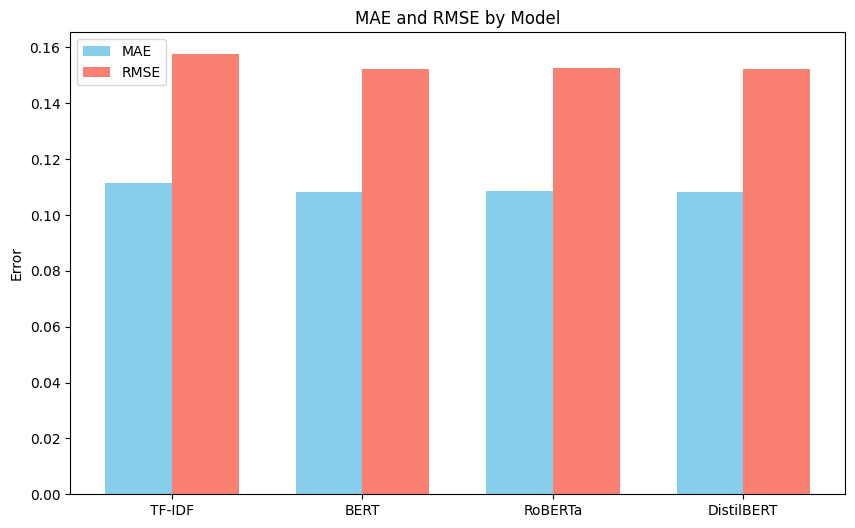

In [ ]:
mae_values = [MAE_CBF, MAE_bert, MAE_roberta, MAE_distilbert]
rmse_values = [rmse_cbf_tfidf, rmse_cbf_bert, rmse_cbf_roberta, rmse_cbf_distilbert]
labels = ['TF-IDF', 'BERT', 'RoBERTa', 'DistilBERT']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, mae_values, width, label='MAE', color='skyblue')
rects2 = ax.bar(x + width/2, rmse_values, width, label='RMSE', color='salmon')

ax.set_ylabel('Error')
ax.set_title('MAE and RMSE by Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

# Cold Start Scenario

In [ ]:
movie_genres_df = df_film[['name', 'genre']].copy()
movie_genres_df.rename(columns={'name': 'movie'}, inplace=True)

In [ ]:
filtered_film = df['nama film'].unique()
df_rating_filtered = df_rating[df_rating['judul_film'].isin(filtered_film)]
user_ratings_count = df_rating_filtered['nama_akun'].value_counts()

print("Number of ratings per user (most to least):")
print(user_ratings_count)

Number of ratings per user (most to least):
nama_akun
moviemenfes        3378
slashfilm          2940
BFI                1703
GilaFilmID         1700
djaycoholyc        1647
akstanwyck         1638
bicaraboxoffice    1618
danieldokter       1550
ErikDavis          1409
TarizSolis         1223
WatchmenID         1178
CenayangFilm       1102
HabisNontonFilm    1086
zavvi               872
ScreenSaversID      853
sir_amirsyarif      750
Elbert_Reyner       622
hafilova            523
moviegoersID        510
sinema911           470
arulfittron         465
commaditya          385
MovieManID          354
cinemuach           345
aerorun             309
paradigmafilm       289
sinemagerbanget     272
teppy87             266
AnakNonton          236
Rivki_Mogi          222
KermodeMovie        201
rayculz             187
asliga              165
eug                 134
alisonwillmore      114
kampusfilmID        110
winseulbear          66
ngobrolinpilem       37
MintzPlasse           3
Name: coun

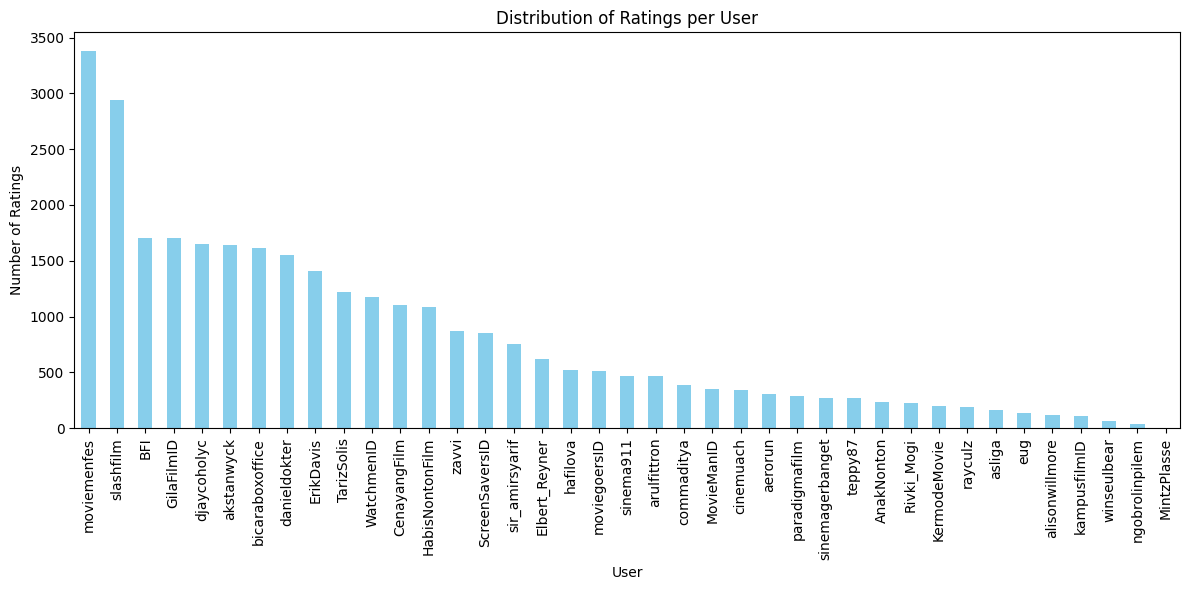

In [ ]:
plt.figure(figsize=(12, 6))
user_ratings_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ratings per User')
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
cold_start_threshold = 20
user_ratings_count = (df_transposed != 0).sum(axis=1)
cold_start_users_list = user_ratings_count[user_ratings_count <= cold_start_threshold].index.tolist()

print(f"\nDefinisi Cold-Start User: Memiliki <= {cold_start_threshold} ulasan")
print(f"Jumlah Cold-Start User teridentifikasi: {len(cold_start_users_list)}")
print("Daftar User:", cold_start_users_list)


Definisi Cold-Start User: Memiliki <= 20 ulasan
Jumlah Cold-Start User teridentifikasi: 4
Daftar User: ['kampusfilmID', 'eug', 'ngobrolinpilem', 'MintzPlasse']


In [ ]:
from sklearn.metrics import ndcg_score

n_profile_items = 2
cold_start_test_set = []

for user in cold_start_users_list:
    rated_items = df_rating_filtered[df_rating_filtered['nama_akun'] == user]['judul_film'].tolist()

    if len(rated_items) > n_profile_items:
        profile_items = rated_items[:n_profile_items]
        ground_truth_items = rated_items[n_profile_items:]
        cold_start_test_set.append({
            "user_id": user,
            "profile_items": profile_items,
            "ground_truth": ground_truth_items
        })

In [ ]:
def recommend_for_new_user_cbf(profile_items, similarity_matrix, n=10):
    combined_scores = similarity_matrix[profile_items].max(axis=1)
    recommendations = combined_scores.drop(profile_items, errors='ignore')
    return recommendations.sort_values(ascending=False).head(n)

In [ ]:
def evaluate_cold_start_model(similarity_matrix, test_set, k=5):
    precisions, recalls, ndcgs = [], [], []
    per_user_results = []

    for test_case in test_set:
        profile = test_case['profile_items']
        ground_truth = test_case['ground_truth']
        user_id = test_case['user_id']

        # Top-K rekomendasi
        top_k_recs = recommend_for_new_user_cbf(profile, similarity_matrix, n=k)
        recommended_items = top_k_recs.index.tolist()

        # precision & recall
        hits = len(set(recommended_items) & set(ground_truth))
        precisions.append(hits / k)
        recalls.append(hits / len(ground_truth) if len(ground_truth) > 0 else 0)

        # nDCG
        true_relevance = np.zeros((1, k))
        for i, item in enumerate(recommended_items):
            if item in ground_truth:
                true_relevance[0, i] = 1
        if np.sum(true_relevance) > 0:
            pred_scores = np.array([top_k_recs.get(item, 0) for item in recommended_items]).reshape(1, -1)
            ndcgs.append(ndcg_score(true_relevance, pred_scores, k=k))
        elif len(ground_truth) > 0:
            ndcgs.append(0)

        # Ambil genre dari profile user
        profile_genres_list = movie_genres_df.loc[movie_genres_df['movie'].isin(profile), 'genre'].tolist()
        profile_genres_flat = []
        for g in profile_genres_list:
            if isinstance(g, str):
                try:
                    profile_genres_flat.extend(eval(g) if g.startswith('[') else [g])
                except:
                    profile_genres_flat.append(g)
            elif isinstance(g, list):
                profile_genres_flat.extend(g)

        # Simpan hasil per user
        for movie in recommended_items:
            movie_genres = movie_genres_df.loc[movie_genres_df['movie'] == movie, 'genre'].values
            movie_genres = movie_genres[0] if len(movie_genres) > 0 else []
            genre_match = any(g in str(movie_genres) for g in profile_genres_flat)
            per_user_results.append({
                "User": user_id,
                "Movie": movie,
                "Prediction Score": top_k_recs[movie],
                "Genre": movie_genres,
                "Genre Match": genre_match
            })

    return np.mean(precisions), np.mean(recalls), np.mean(ndcgs), pd.DataFrame(per_user_results)

In [ ]:
models_to_evaluate = {
    "TF-IDF": sim_tfidf,
    "BERT": sim_bert,
    "RoBERTa": sim_roberta,
    "DistilBERT": sim_distilbert
}

In [ ]:
k_value = 5
results = []
for model_name, sim_matrix in models_to_evaluate.items():
    precision, recall, ndcg, _ = evaluate_cold_start_model(sim_matrix, cold_start_test_set, k=k_value)
    results.append({
        "Model": model_name,
        f"Precision@{k_value}": precision,
        f"Recall@{k_value}": recall,
        f"NDCG@{k_value}": ndcg
    })

cold_start_table = pd.DataFrame(results)
print("\nEvaluasi CBF pada Skenario Cold-Start")
print(cold_start_table.to_string(index=False))


Evaluasi CBF pada Skenario Cold-Start
     Model  Precision@5  Recall@5   NDCG@5
    TF-IDF         0.05  0.001894 0.250000
      BERT         0.10  0.009037 0.357669
   RoBERTa         0.05  0.001894 0.157732
DistilBERT         0.05  0.001894 0.250000


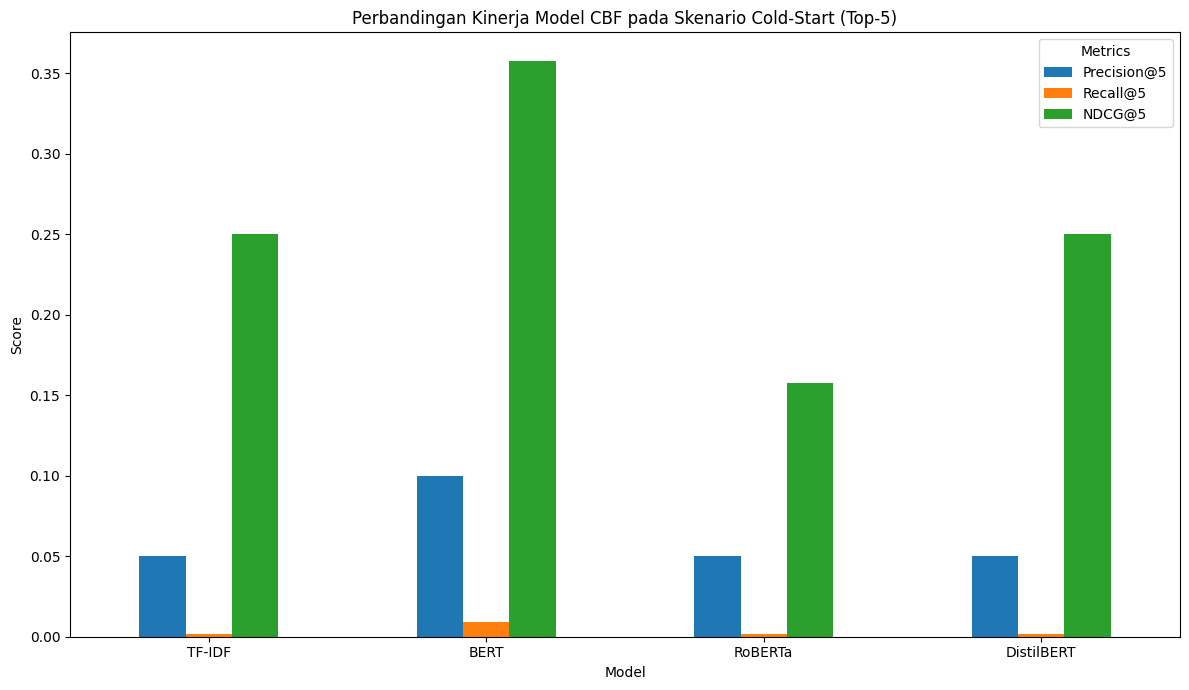

In [ ]:
# Visualisasi hasil
ax = cold_start_table.set_index('Model').plot(kind='bar', rot=0, figsize=(12, 7),
                                             title=f'Perbandingan Kinerja Model CBF pada Skenario Cold-Start (Top-{k_value})')
ax.set_ylabel('Score')
ax.legend(title='Metrics')
plt.tight_layout()
plt.show()

In [ ]:
precision, recall, ndcg, recs_df = evaluate_cold_start_model(sim_bert, cold_start_test_set, k=k_value)
print("\nDetail rekomendasi Cold-Start - BERT")
print(recs_df.head(20))


Detail rekomendasi Cold-Start - BERT
              User                           Movie  Prediction Score  \
0     kampusfilmID                     Love, Rosie          0.923291   
1     kampusfilmID                            Cash          0.921427   
2     kampusfilmID                         Faraway          0.901983   
3     kampusfilmID                   Pain Hustlers          0.893710   
4     kampusfilmID                    The Murderer          0.892174   
5              eug                      You People          0.886725   
6              eug               Pieces of a Woman          0.879324   
7              eug  If Anything Happens I Love You          0.859663   
8              eug                     Tanda Tanya          0.856152   
9              eug             The Disaster Artist          0.852188   
10  ngobrolinpilem                     Love, Rosie          0.923291   
11  ngobrolinpilem                            Cash          0.921427   
12  ngobrolinpilem        